In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:

feature=pd.read_csv('/content/Features_data_set.csv',parse_dates=["Date"])
sales=pd.read_csv('/content/sales_data_set.csv',parse_dates=["Date"])
store=pd.read_csv('/content/stores_data_set.csv')

<ipython-input-9-4a690e9473af>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  feature=pd.read_csv('/content/Features_data_set.csv',parse_dates=["Date"])
<ipython-input-9-4a690e9473af>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  sales=pd.read_csv('/content/sales_data_set.csv',parse_dates=["Date"])


In [ ]:
data_date = feature.groupby("Date").agg({"Temperature":"mean"
                                            ,"Fuel_Price":"mean"
                                            ,"IsHoliday":"sum"
                                            ,"CPI":"mean"
                                           ,"Unemployment":"mean"})
data_date = data_date.sort_index()
temp_date_data = data_date[:'2012-12-10']

data_sales_date = sales.groupby("Date").agg({"Weekly_Sales":"sum"})
data_sales_date.sort_index(inplace=True)
data_sales_date.Weekly_Sales = data_sales_date.Weekly_Sales/1000000
data_sales_date.Weekly_Sales = data_sales_date.Weekly_Sales.apply(int)
data = pd.merge(data_sales_date, temp_date_data, left_index=True,right_index=True, how='left')
data["IsHoliday"] = data["IsHoliday"].apply(lambda x: True if x == 45.0 else False )
print(data.describe())

       Weekly_Sales  Temperature  Fuel_Price         CPI  Unemployment
count    143.000000   143.000000  143.000000  143.000000    143.000000
mean      46.601399    60.663782    3.358607  171.578394      7.999151
std        5.399713    15.172792    0.429401    3.100148      0.483853
min       39.000000    30.480889    2.672067  167.546485      6.953711
25%       44.000000    47.720222    2.885367  168.408144      7.508333
50%       46.000000    61.051111    3.488644  171.386189      8.150133
75%       47.000000    74.697333    3.726133  174.724576      8.428578
max       80.000000    82.176444    3.997778  176.652613      8.619311


<Axes: title={'center': 'Unemployment'}, xlabel='Date'>

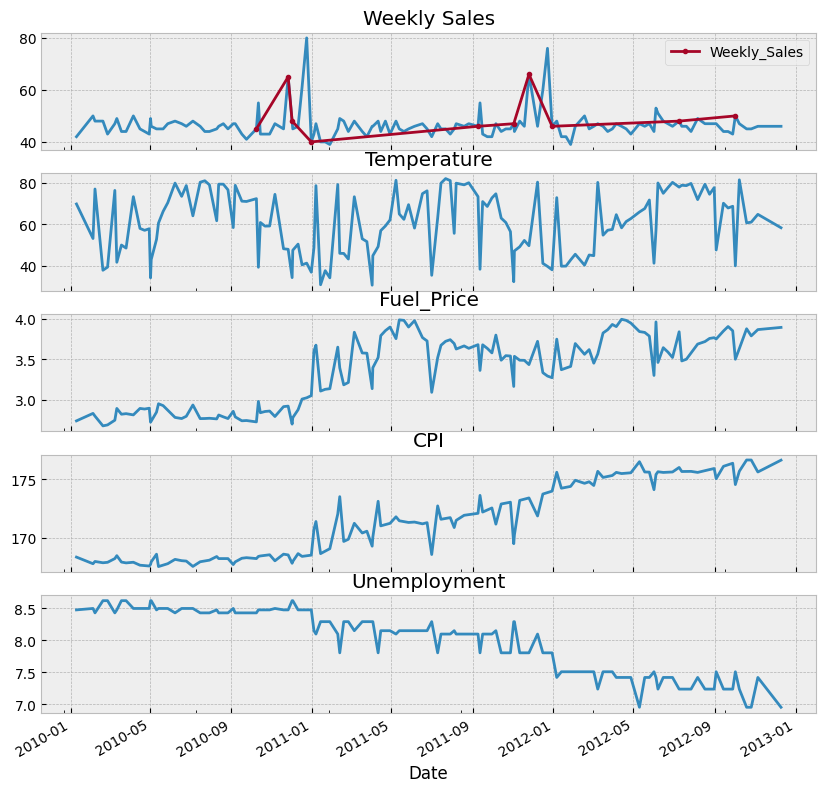

In [ ]:
plt.style.use('bmh')
fig, ax = plt.subplots(5,1,figsize=(10,10),sharex=True)
data["Weekly_Sales"].plot(ax=ax[0],title="Weekly Sales")
data[data.IsHoliday==True]["Weekly_Sales"].plot(marker=".",ax=ax[0],legend="Holiday Week sale")
data["Temperature"].plot(ax=ax[1], title="Temperature")
data["Fuel_Price"].plot(ax=ax[2],title="Fuel_Price")
data["CPI"].plot(ax=ax[3],title="CPI")
data["Unemployment"].plot(ax=ax[4],title="Unemployment")


<Axes: >

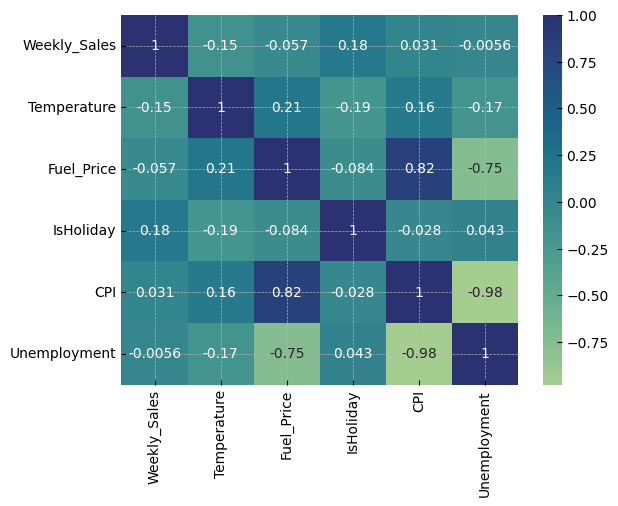

In [ ]:
sns.heatmap(data.corr(),cmap="crest", annot=True)

Text(0, 0.5, 'Sales')

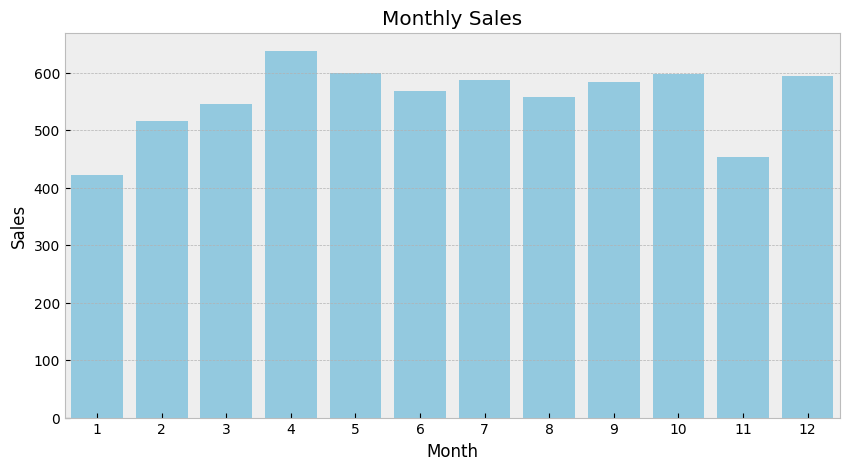

In [ ]:
data_sales_month = data.groupby(data.index.month).agg({"Weekly_Sales":"sum"})
plt.figure(figsize=(10, 5))
sns.barplot(x=data_sales_month.index,y=data_sales_month.Weekly_Sales, color="skyblue", fill=True)
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Sales")

Text(0, 0.5, 'Sales')

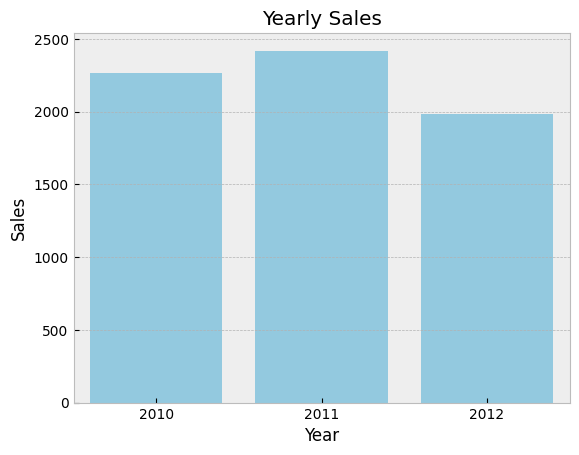

In [ ]:
data_sales_year = data.groupby(data.index.year).agg({"Weekly_Sales":"sum"})
sns.barplot(x=data_sales_year.index,y=data_sales_year.Weekly_Sales, color="skyblue")
plt.title("Yearly Sales")
plt.xlabel("Year")
plt.ylabel("Sales")

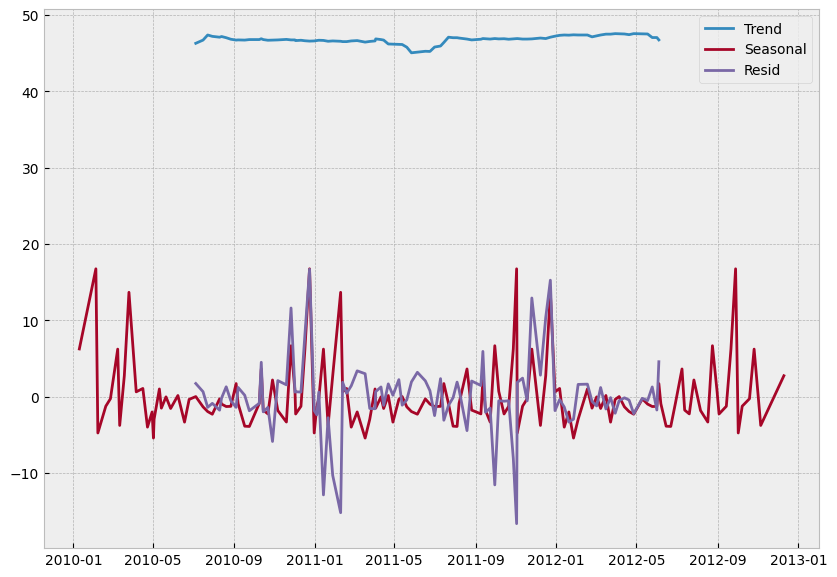

In [ ]:
decomposition = seasonal_decompose(data["Weekly_Sales"], period=45)
plt.figure(figsize=(10, 7))
plt.plot(decomposition.trend)
plt.plot(decomposition.seasonal)
plt.plot(decomposition.resid)
plt.legend(["Trend", "Seasonal","Resid"], loc ="upper right")

In [ ]:

data_Store = feature.groupby("Store").agg({"Temperature":"mean","Fuel_Price":"mean","IsHoliday":"sum"})
temp_store = sales.groupby("Store").agg({"Weekly_Sales":"sum"})
temp_store.Weekly_Sales = temp_store.Weekly_Sales/1000000
temp_store.Weekly_Sales = temp_store.Weekly_Sales.apply(int)
data_Store.set_index(np.arange(0,45),inplace=True)
store["temp"] = data_Store.Temperature
store["Fuel_Price"] = data_Store.Fuel_Price
store["holiday"] = data_Store.IsHoliday
store["Weekly_Sales"] = temp_store.Weekly_Sales
store.describe()

,Store,Size,temp,Fuel_Price,holiday,Weekly_Sales
count,45.000000,45.000000,45.000000,45.000000,45.0,44.000000
mean,23.000000,130287.600000,59.356198,3.405992,13.0,150.090909
std,13.133926,63825.271991,9.956122,0.153935,0.0,78.780478
min,1.000000,34875.000000,37.921264,3.245945,13.0,37.000000
25%,12.000000,70713.000000,51.866319,3.259242,13.0,78.500000
50%,23.000000,126512.000000,58.107912,3.328764,13.0,140.500000
75%,34.000000,202307.000000,68.504670,3.497874,13.0,200.750000
max,45.000000,219622.000000,75.438077,3.643654,13.0,301.000000


<Axes: xlabel='Type', ylabel='Weekly_Sales'>

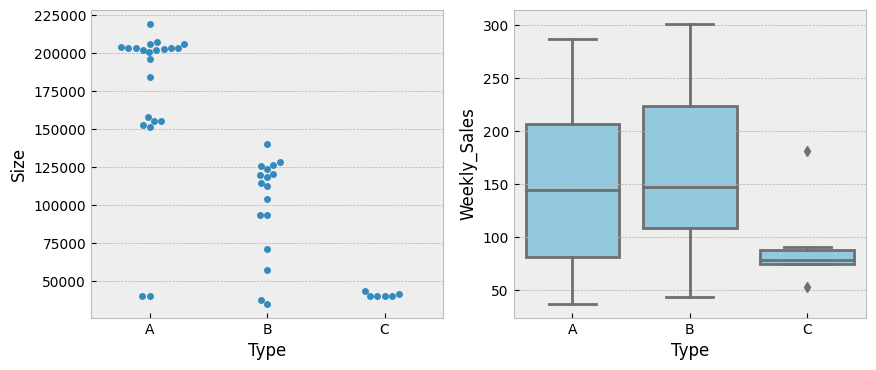

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(10, 4))
sns.swarmplot(data = store,y="Size",x="Type",ax=ax[0])
sns.boxplot(data = store,y="Weekly_Sales",x="Type",ax=ax[1], color="skyblue")

Text(0.5, 0, 'Department')

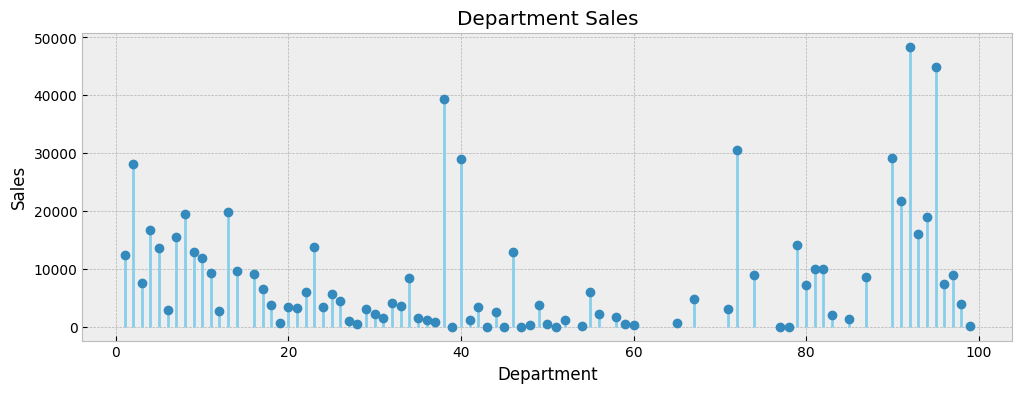

In [ ]:
data_Dept = sales.groupby("Dept").agg({"Weekly_Sales":"sum"})
data_Dept.Weekly_Sales = data_Dept.Weekly_Sales/10000
data_Dept.Weekly_Sales = data_Dept.Weekly_Sales.apply(int)
data_Dept.sort_values(by="Weekly_Sales")
fig1, ax1 = plt.subplots(figsize=(12, 4))
plt.vlines(x=data_Dept.index, ymin=0, ymax=data_Dept['Weekly_Sales'], color='skyblue')
plt.plot(data_Dept.index,data_Dept['Weekly_Sales'], "o")
plt.title("Department Sales")
plt.ylabel("Sales")
plt.xlabel("Department")

<Axes: xlabel='Date', ylabel='Weekly_Sales'>

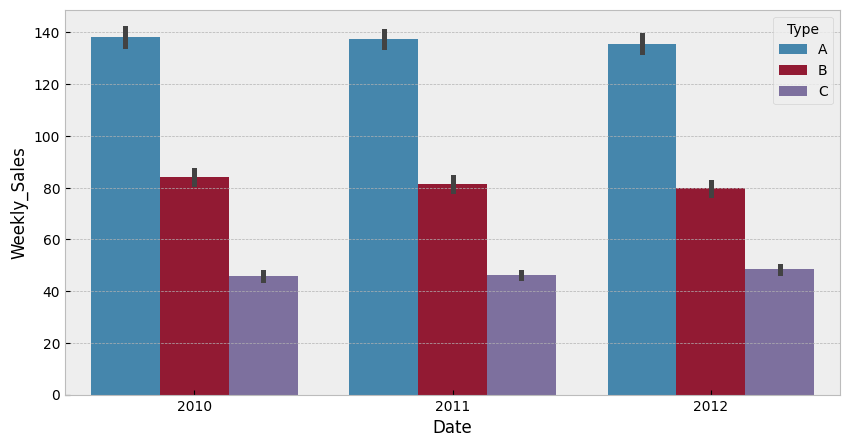

In [ ]:
#Analysis Store Type and Year,Month Wise
sales_date_store = sales.groupby(["Date","Store"]).agg({"Weekly_Sales":"sum"})
sales_date_store.sort_index(inplace=True)
sales_date_store.Weekly_Sales = sales_date_store.Weekly_Sales/10000
sales_date_store.Weekly_Sales = sales_date_store.Weekly_Sales.apply(int)
data_table = pd.merge(feature,sales_date_store ,  how='left', on=["Date","Store"])
data_table = pd.merge(data_table,store[["Store","Type"]] ,  how='left', on=["Store"])
data_table.head(20)
data_train = data_table[data_table.Weekly_Sales.notnull()]
data_test = data_table[data_table.Weekly_Sales.isnull()]
plt.figure(figsize=(10, 5))
sns.barplot(x=data_train.Date.dt.year, y=data_train.Weekly_Sales,hue=data_train.Type)

<Axes: xlabel='Date', ylabel='Weekly_Sales'>

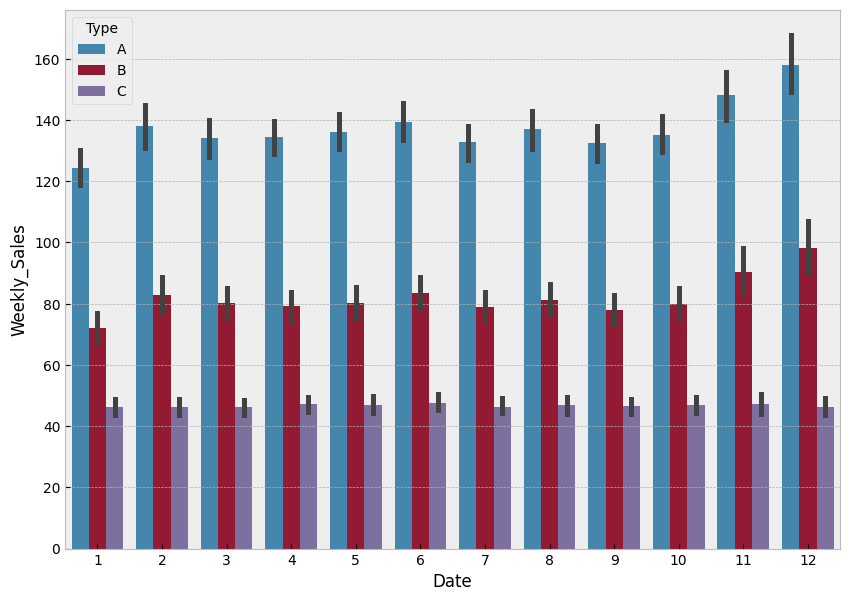

In [ ]:
plt.figure(figsize=(10, 7))
sns.barplot(x=data_train.Date.dt.month, y=data_train.Weekly_Sales,hue=data_train.Type)

Text(0.5, 0, 'Date')

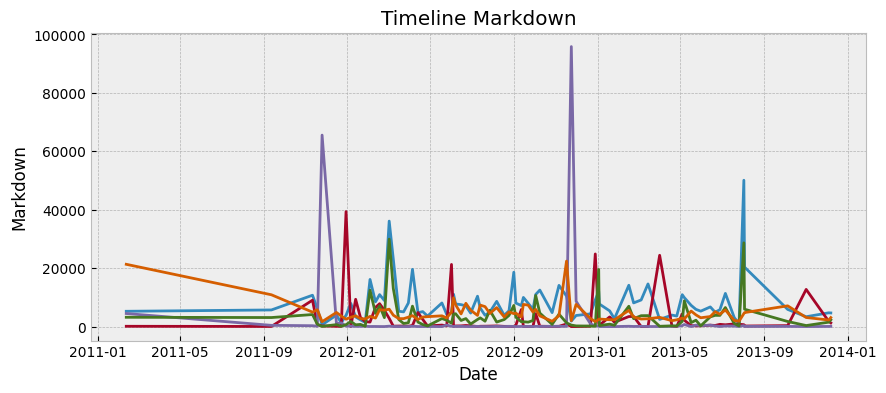

In [ ]:
#Analysis of MarkDown
plt.figure(figsize=(10,4))
train_markdown = data_table[data_table.MarkDown2.notnull()]
train_markdown = train_markdown.groupby("Date").agg({"MarkDown1":"mean","MarkDown2":"mean","MarkDown3":"mean","MarkDown4":"mean","MarkDown5":"mean"})
plt.plot(train_markdown.index,train_markdown.MarkDown1)
plt.plot(train_markdown.index,train_markdown.MarkDown2)
plt.plot(train_markdown.index,train_markdown.MarkDown3)
plt.plot(train_markdown.index,train_markdown.MarkDown4)
plt.plot(train_markdown.index,train_markdown.MarkDown5)
plt.title("Timeline Markdown")
plt.ylabel("Markdown")
plt.xlabel("Date")

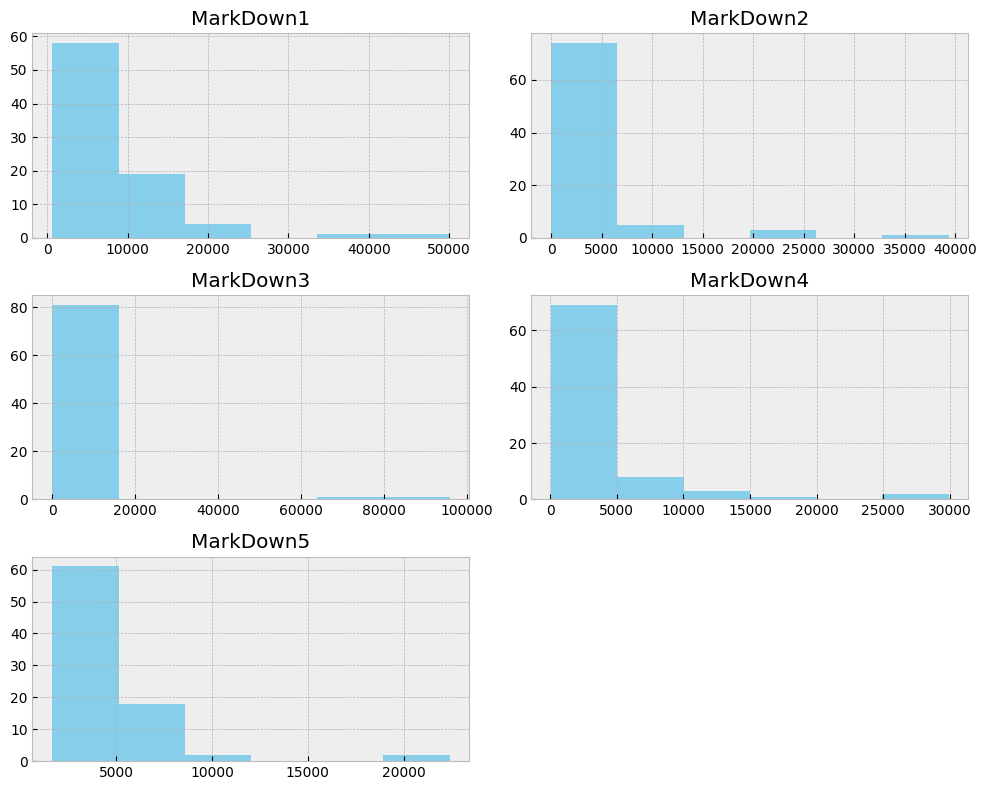

In [ ]:

train_markdown.hist(figsize=(10,8),bins=6,color='skyblue')
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Month')

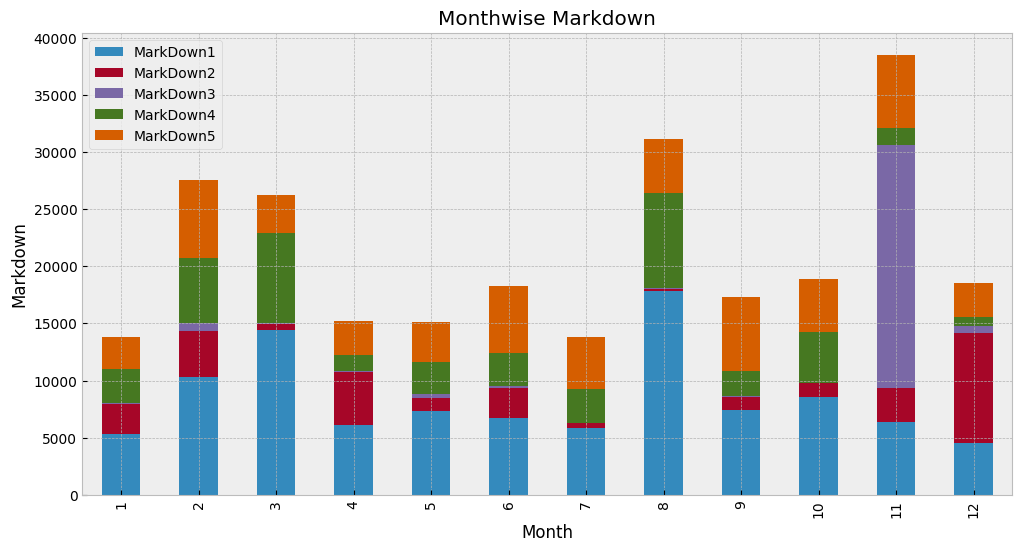

In [ ]:
train_markdown_month = train_markdown.groupby(train_markdown.index.month).agg({"MarkDown1":"mean","MarkDown2":"mean","MarkDown3":"mean","MarkDown4":"mean","MarkDown5":"mean"})
train_markdown_month.plot(kind='bar', stacked=True,figsize=(12,6))
plt.title("Monthwise Markdown")
plt.ylabel("Markdown")
plt.xlabel("Month")

Text(0, 0.5, 'Markdown')

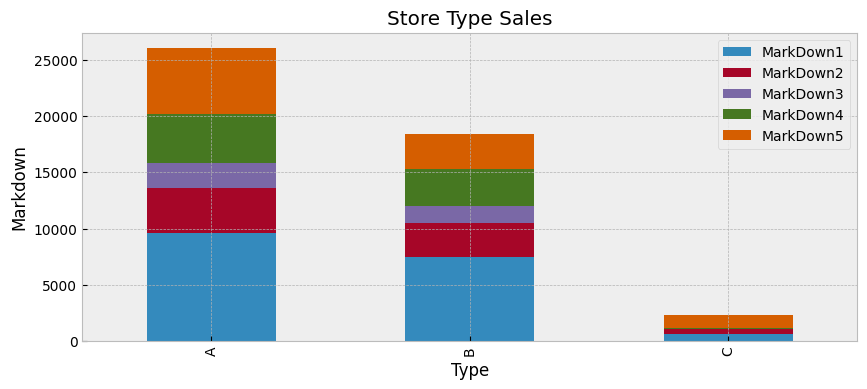

In [ ]:
train_markdown_1 = data_table[data_table.MarkDown2.notnull()]
train_markdown_type = train_markdown_1.groupby("Type").agg({"MarkDown1":"mean","MarkDown2":"mean","MarkDown3":"mean","MarkDown4":"mean","MarkDown5":"mean"})
train_markdown_type.plot(kind='bar', stacked=True,figsize=(10,4))
plt.title("Store Type Sales")
plt.ylabel("Markdown")